# API Notes for Python Packages

## [arch](https://arch.readthedocs.io/en/latest/)

* [arch.univariate.GARCH(p=1, o=0, q=1, power=2.0)](https://arch.readthedocs.io/en/latest/univariate/generated/arch.univariate.GARCH.html)
\begin{align*}
        \sigma_{t}^{\lambda} = \omega
        + \sum_{i=1}^{p}\alpha_{i}\left|\epsilon_{t-i}\right|^{\lambda}
        +\sum_{j=1}^{o}\gamma_{j}\left|\epsilon_{t-j}\right|^{\lambda}
        I\left[\epsilon_{t-j}<0\right]+\sum_{k=1}^{q}\beta_{k}\sigma_{t-k}^{\lambda}
\end{align*}
    * $\lambda$ 就是 `power`，預設值 2
* [GARCH.simulate(parameters, nobs, rng, burn=500, initial_value=None)](https://arch.readthedocs.io/en/latest/univariate/generated/generated/arch.univariate.GARCH.simulate.html)
    * 根據 [source](https://arch.readthedocs.io/en/latest/_modules/arch/univariate/volatility.html#GARCH.simulate)，`parameters` 要輸入 [$\omega, \alpha_{1}, \alpha_{2}, \ldots, \alpha_{p}, \gamma_{1}, \gamma_{2}, \ldots, \gamma_{o}, \beta_{1}, \beta_{2}, \ldots, \beta_{q}$]
    * `rng` 是一個輸入 size 輸出隨機數列的函數，輸出用作 innovation
* ARCH(1) Simulation: 

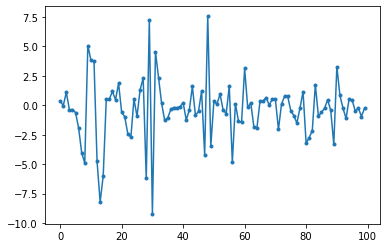

In [8]:
from arch.univariate import GARCH
from scipy.stats import norm, t
from pandas import Series
import numpy as np
import numpy.random

numpy.random.seed(0)
model = GARCH(1, 0, 0)
resid, variance = model.simulate([1, 0.5], 100, rng=lambda size: norm.rvs(size=size))

Series(resid*np.sqrt(variance)).plot(style='.-')
pass